# 18: 量子サポートベクターマシン(SVM)

この量子SVMの量子回路の構造は、[Vojtěch Havlíček, Antonio D. Córcoles, Kristan Temme et al (2019)](https://www.nature.com/articles/s41586-019-0980-2#Abs1)の論文を参考にしています。

In [1]:
from renom_q import *
from renom_q.ml.qsvm import QSVM
import numpy as np

イジングモデルによる断熱量子計算を利用して、サポートベクターマシン(SVM)のデータ分類を行う。

- 量子サポートベクターマシンのコード  
 https://github.com/ReNom-dev-team/ReNomQ/blob/release/0.2/renom_q/ml/qsvm.py

`QSVM.fit(train_data, train_label)`で識別器の学習。

In [2]:
train_xy = np.array([[5, 4], [6, 6], [4, 9], [8, 1], [9, 7], [1, 4], [4, 6]])
train_label = np.array([1, 1, -1, -1, -1, -1, 1])

qsvm = QSVM()
qsvm.fit(train_xy, train_label)

`QSVM.plot_graph(data, label)`で訓練データのグラフ描画。

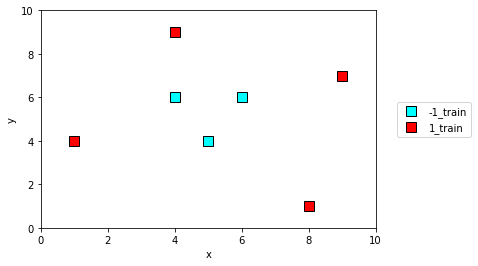

In [3]:
qsvm.plot_graph(train_xy, train_label)

`QSVM.predict(test_data)`でテストデータのラベル推定。

In [4]:
test = np.array([[3, 3], [7, 4], [4, 7], [5, 1], [2, 5], [3, 9],
                 [6, 9], [8, 7], [3, 5], [2, 4], [9, 9], [4, 3], [6, 4], [4, 4]])
label = qsvm.predict(test)
print(label)

[1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, 1]


`QSVM.plot_graph(train_data, train_label, test_data, test_label)`で訓練データとテストデータのグラフ描画。

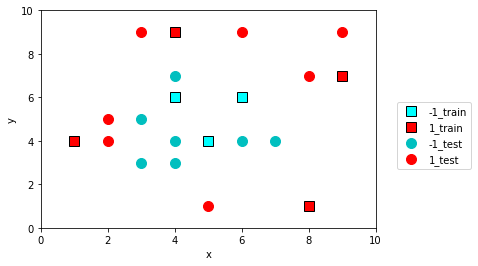

In [5]:
qsvm.plot_graph(train_xy, train_label, test, label)

`QSVM.plot_graph(x_test, y_pred)`でテストデータのみのグラフ描画。

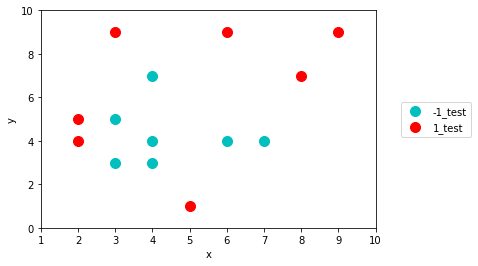

In [6]:
qsvm.plot_graph(x_test=test, y_pred=label)

`QSVM.result`を表示させることで、各データ点を分類した際の計算結果を見ることができる。

In [7]:
print(qsvm.result)

{'[3 3]': {'solution': array([1, 1, 0, 0, 0, 0, 1, 0]), 'result': {'01000011': 2, '10000010': 1, '10000011': 1, '11000000': 1, '11000001': 1, '11000010': 558, '11000011': 452, '11000110': 3, '11001010': 1, '11010010': 1, '11010011': 1, '11100010': 2}, 'J': array([[0.        , 0.4472136 , 0.19611614, 0.23570226, 0.2       ,
        0.25      , 0.4472136 , 0.4472136 ],
       [0.4472136 , 0.        , 0.2773501 , 0.18569534, 0.31622777,
        0.18569534, 0.5       , 0.23570226],
       [0.19611614, 0.2773501 , 0.        , 0.1118034 , 0.18569534,
        0.17149859, 0.33333333, 0.16439899],
       [0.23570226, 0.18569534, 0.1118034 , 0.        , 0.16439899,
        0.13130643, 0.15617376, 0.18569534],
       [0.2       , 0.31622777, 0.18569534, 0.16439899, 0.        ,
        0.11704115, 0.19611614, 0.13867505],
       [0.25      , 0.18569534, 0.17149859, 0.13130643, 0.11704115,
        0.        , 0.2773501 , 0.4472136 ],
       [0.4472136 , 0.5       , 0.33333333, 0.15617376, 0.1961161

高次元の訓練データおよびテストデータでもデータ分類可能。

In [8]:
train_xy = np.array([[5, 4, 7, 4], [6, 6, 2, 9], [4, 9, 1 ,2], [8, 1, 6, 7]])
train_label = np.array([1, 1, -1, -1])

qsvm = QSVM()
qsvm.fit(train_xy, train_label)

test = np.array([[3, 2, 1, 6], [9, 4, 5, 6]])
label = qsvm.predict(test)
print(label)

[1, -1]


***

量子回路を描画する場合は、始めに`QSVM(set_qasm=True)`と設定することで、`QSVM.result`にqasmコードが追加される。